In [1]:
import requests
from requests import get

import calendar
import datetime
import dateutil.relativedelta

import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd

from scipy import stats
from scipy import interpolate

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# global setting for DataFrames and visualizations
pd.set_option("display.max_columns", None)
plt.rc("figure", figsize=(16, 8))
sns.set_palette("colorblind")

---

# Global Variables

---

In [3]:
headers = {"Ocp-Apim-Subscription-Key": "02b5f27418ce4bcb89e737a6a9717d05"}

# Table of Contents

- [Global Variables](#Global-Variables)
- [Table of Contents](#Table-of-Contents)
- [Wrangle](#Wrangle)
    - [Preliminary Analysis](#Preliminary-Analysis)
    - [Make a Loop](#Make-a-Loop)

# Wrangle

## Preliminary Analysis

In [4]:
game_stats = """https://api.sportsdata.io/v3/nfl/stats/json/PlayerGameStatsByWeek/2023/1"""
response = requests.get(game_stats, headers=headers)
w1 = pd.DataFrame(response.json())
w1.head()

,GameKey,PlayerID,SeasonType,Season,GameDate,Week,Team,Opponent,HomeOrAway,Number,Name,Position,PositionCategory,Activated,Played,Started,PassingAttempts,PassingCompletions,PassingYards,PassingCompletionPercentage,PassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PassingInterceptions,PassingRating,PassingLong,PassingSacks,PassingSackYards,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,RushingLong,ReceivingTargets,Receptions,ReceivingYards,ReceivingYardsPerReception,ReceivingTouchdowns,ReceivingLong,Fumbles,FumblesLost,PuntReturns,PuntReturnYards,PuntReturnYardsPerAttempt,PuntReturnTouchdowns,PuntReturnLong,KickReturns,KickReturnYards,KickReturnYardsPerAttempt,KickReturnTouchdowns,KickReturnLong,SoloTackles,AssistedTackles,TacklesForLoss,Sacks,SackYards,QuarterbackHits,PassesDefended,FumblesForced,FumblesRecovered,FumbleReturnYards,FumbleReturnTouchdowns,Interceptions,InterceptionReturnYards,InterceptionReturnTouchdowns,BlockedKicks,SpecialTeamsSoloTackles,SpecialTeamsAssistedTackles,MiscSoloTackles,MiscAssistedTackles,Punts,PuntYards,PuntAverage,FieldGoalsAttempted,FieldGoalsMade,FieldGoalsLongestMade,ExtraPointsMade,TwoPointConversionPasses,TwoPointConversionRuns,TwoPointConversionReceptions,FantasyPoints,FantasyPointsPPR,ReceptionPercentage,ReceivingYardsPerTarget,Tackles,OffensiveTouchdowns,DefensiveTouchdowns,SpecialTeamsTouchdowns,Touchdowns,FantasyPosition,FieldGoalPercentage,PlayerGameID,FumblesOwnRecoveries,FumblesOutOfBounds,KickReturnFairCatches,PuntReturnFairCatches,PuntTouchbacks,PuntInside20,PuntNetAverage,ExtraPointsAttempted,BlockedKickReturnTouchdowns,FieldGoalReturnTouchdowns,Safeties,FieldGoalsHadBlocked,PuntsHadBlocked,ExtraPointsHadBlocked,PuntLong,BlockedKickReturnYards,FieldGoalReturnYards,PuntNetYards,SpecialTeamsFumblesForced,SpecialTeamsFumblesRecovered,MiscFumblesForced,MiscFumblesRecovered,ShortName,PlayingSurface,IsGameOver,SafetiesAllowed,Stadium,Temperature,Humidity,WindSpeed,FanDuelSalary,DraftKingsSalary,FantasyDataSalary,OffensiveSnapsPlayed,DefensiveSnapsPlayed,SpecialTeamsSnapsPlayed,OffensiveTeamSnaps,DefensiveTeamSnaps,SpecialTeamsTeamSnaps,VictivSalary,TwoPointConversionReturns,FantasyPointsFanDuel,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,YahooSalary,FantasyPointsYahoo,InjuryStatus,InjuryBodyPart,InjuryStartDate,InjuryNotes,FanDuelPosition,DraftKingsPosition,YahooPosition,OpponentRank,OpponentPositionRank,InjuryPractice,InjuryPracticeDescription,DeclaredInactive,FantasyDraftSalary,FantasyDraftPosition,TeamID,OpponentID,Day,DateTime,GlobalGameID,GlobalTeamID,GlobalOpponentID,ScoreID,FantasyPointsFantasyDraft,OffensiveFumbleRecoveryTouchdowns,SnapCountsConfirmed,Updated,ScoringDetails
0,202310129,18082,1,2023,2023-09-10T16:25:00,1,MIA,LAC,AWAY,10,Tyreek Hill,WR,OFF,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.5,12.1,236.9,21.5,2.4,51.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.9,49.0,80.8,15.8,0.0,2.4,0.0,0.0,2.4,WR,0.0,990983380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tyreek Hill,Artificial,True,0.0,SoFi Stadium,90,82,12,9698.0,9036.0,9036.0,48,0,0,74,89,34,None,0.0,43.0,0.0,0.0,0.0,0.0,0.0,52.3,37.0,43.0,Scrambled,Scrambled,None,Scrambled,Scrambled,Scrambled,Scrambled,20.0,9.0,Scrambled,Scrambled,False,None,None,19,29,2023-09-10T00:00:00,2023-09-10T16:25:00,18497,19,29,18497,52.3,None,True,2023-09-15T16:20:56,"[{'GameKey': '202310129', 'SeasonType': 1, 'Pl..."
1,202310128,18916,1,2023,2023-09-10T13:00:00,1,PIT,SF,HOME,90,T.J. Watt,LB,DEF,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1,0.0,1.2,3.6,18.7,6.1,1.2,2.4,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [5]:
w1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Columns: 169 entries, GameKey to ScoringDetails
dtypes: bool(3), float64(113), int64(24), object(29)
memory usage: 2.2+ MB


## Make a Loop

In [6]:
# creating an empty df to append the api calls data to
df = pd.DataFrame()

In [7]:
weeks_in_a_season = 18

In [8]:
for i in range(1,weeks_in_a_season+1):
    
    # this is the url to pass into our requests.get() function
    url = f"""https://api.sportsdata.io/v3/nfl/stats/json/PlayerGameStatsByWeek/2023/{i}"""
    
    # this is what the our requests.get() returns
    response = requests.get(url, headers=headers)
    
    # capture the data for the week of the season in a dataframe
    player_game_stats_by_week = pd.DataFrame(response.json())
    
    # append data to dataframe
    df = df.append(player_game_stats_by_week)

In [9]:
df

,GameKey,PlayerID,SeasonType,Season,GameDate,Week,Team,Opponent,HomeOrAway,Number,Name,Position,PositionCategory,Activated,Played,Started,PassingAttempts,PassingCompletions,PassingYards,PassingCompletionPercentage,PassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PassingInterceptions,PassingRating,PassingLong,PassingSacks,PassingSackYards,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,RushingLong,ReceivingTargets,Receptions,ReceivingYards,ReceivingYardsPerReception,ReceivingTouchdowns,ReceivingLong,Fumbles,FumblesLost,PuntReturns,PuntReturnYards,PuntReturnYardsPerAttempt,PuntReturnTouchdowns,PuntReturnLong,KickReturns,KickReturnYards,KickReturnYardsPerAttempt,KickReturnTouchdowns,KickReturnLong,SoloTackles,AssistedTackles,TacklesForLoss,Sacks,SackYards,QuarterbackHits,PassesDefended,FumblesForced,FumblesRecovered,FumbleReturnYards,FumbleReturnTouchdowns,Interceptions,InterceptionReturnYards,InterceptionReturnTouchdowns,BlockedKicks,SpecialTeamsSoloTackles,SpecialTeamsAssistedTackles,MiscSoloTackles,MiscAssistedTackles,Punts,PuntYards,PuntAverage,FieldGoalsAttempted,FieldGoalsMade,FieldGoalsLongestMade,ExtraPointsMade,TwoPointConversionPasses,TwoPointConversionRuns,TwoPointConversionReceptions,FantasyPoints,FantasyPointsPPR,ReceptionPercentage,ReceivingYardsPerTarget,Tackles,OffensiveTouchdowns,DefensiveTouchdowns,SpecialTeamsTouchdowns,Touchdowns,FantasyPosition,FieldGoalPercentage,PlayerGameID,FumblesOwnRecoveries,FumblesOutOfBounds,KickReturnFairCatches,PuntReturnFairCatches,PuntTouchbacks,PuntInside20,PuntNetAverage,ExtraPointsAttempted,BlockedKickReturnTouchdowns,FieldGoalReturnTouchdowns,Safeties,FieldGoalsHadBlocked,PuntsHadBlocked,ExtraPointsHadBlocked,PuntLong,BlockedKickReturnYards,FieldGoalReturnYards,PuntNetYards,SpecialTeamsFumblesForced,SpecialTeamsFumblesRecovered,MiscFumblesForced,MiscFumblesRecovered,ShortName,PlayingSurface,IsGameOver,SafetiesAllowed,Stadium,Temperature,Humidity,WindSpeed,FanDuelSalary,DraftKingsSalary,FantasyDataSalary,OffensiveSnapsPlayed,DefensiveSnapsPlayed,SpecialTeamsSnapsPlayed,OffensiveTeamSnaps,DefensiveTeamSnaps,SpecialTeamsTeamSnaps,VictivSalary,TwoPointConversionReturns,FantasyPointsFanDuel,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,YahooSalary,FantasyPointsYahoo,InjuryStatus,InjuryBodyPart,InjuryStartDate,InjuryNotes,FanDuelPosition,DraftKingsPosition,YahooPosition,OpponentRank,OpponentPositionRank,InjuryPractice,InjuryPracticeDescription,DeclaredInactive,FantasyDraftSalary,FantasyDraftPosition,TeamID,OpponentID,Day,DateTime,GlobalGameID,GlobalTeamID,GlobalOpponentID,ScoreID,FantasyPointsFantasyDraft,OffensiveFumbleRecoveryTouchdowns,SnapCountsConfirmed,Updated,ScoringDetails
0,202310129,18082,1,2023,2023-09-10T16:25:00,1,MIA,LAC,AWAY,10,Tyreek Hill,WR,OFF,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.5,12.1,236.9,21.5,2.4,51.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.9,49.0,80.8,15.8,0.0,2.4,0.0,0.0,2.4,WR,0.0,990983380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tyreek Hill,Artificial,True,0.0,SoFi Stadium,90,82,12,9698.0,9036.0,9036.0,48.0,0.0,0.0,74.0,89.0,34.0,None,0.0,43.0,0.0,0.0,0.0,0.0,0.0,52.3,37.0,43.0,Scrambled,Scrambled,None,Scrambled,Scrambled,Scrambled,Scrambled,20.0,9.0,Scrambled,Scrambled,False,None,None,19,29,2023-09-10T00:00:00,2023-09-10T16:25:00,18497,19,29,18497,52.3,None,True,2023-09-15T16:20:56,"[{'GameKey': '202310129', 'SeasonType': 1, 'Pl..."
1,202310128,18916,1,2023,2023-09-10T13:00:00,1,PIT,SF,HOME,90,T.J. Watt,LB,DEF,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1,0.0,1.2,3.6,18.7,6.1,1.2,2.4,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29675 entries, 0 to 1761
Columns: 169 entries, GameKey to ScoringDetails
dtypes: bool(2), float64(119), int64(18), object(30)
memory usage: 38.1+ MB


In [11]:
df[df.Name == "De'Von Achane"]

,GameKey,PlayerID,SeasonType,Season,GameDate,Week,Team,Opponent,HomeOrAway,Number,Name,Position,PositionCategory,Activated,Played,Started,PassingAttempts,PassingCompletions,PassingYards,PassingCompletionPercentage,PassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PassingInterceptions,PassingRating,PassingLong,PassingSacks,PassingSackYards,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,RushingLong,ReceivingTargets,Receptions,ReceivingYards,ReceivingYardsPerReception,ReceivingTouchdowns,ReceivingLong,Fumbles,FumblesLost,PuntReturns,PuntReturnYards,PuntReturnYardsPerAttempt,PuntReturnTouchdowns,PuntReturnLong,KickReturns,KickReturnYards,KickReturnYardsPerAttempt,KickReturnTouchdowns,KickReturnLong,SoloTackles,AssistedTackles,TacklesForLoss,Sacks,SackYards,QuarterbackHits,PassesDefended,FumblesForced,FumblesRecovered,FumbleReturnYards,FumbleReturnTouchdowns,Interceptions,InterceptionReturnYards,InterceptionReturnTouchdowns,BlockedKicks,SpecialTeamsSoloTackles,SpecialTeamsAssistedTackles,MiscSoloTackles,MiscAssistedTackles,Punts,PuntYards,PuntAverage,FieldGoalsAttempted,FieldGoalsMade,FieldGoalsLongestMade,ExtraPointsMade,TwoPointConversionPasses,TwoPointConversionRuns,TwoPointConversionReceptions,FantasyPoints,FantasyPointsPPR,ReceptionPercentage,ReceivingYardsPerTarget,Tackles,OffensiveTouchdowns,DefensiveTouchdowns,SpecialTeamsTouchdowns,Touchdowns,FantasyPosition,FieldGoalPercentage,PlayerGameID,FumblesOwnRecoveries,FumblesOutOfBounds,KickReturnFairCatches,PuntReturnFairCatches,PuntTouchbacks,PuntInside20,PuntNetAverage,ExtraPointsAttempted,BlockedKickReturnTouchdowns,FieldGoalReturnTouchdowns,Safeties,FieldGoalsHadBlocked,PuntsHadBlocked,ExtraPointsHadBlocked,PuntLong,BlockedKickReturnYards,FieldGoalReturnYards,PuntNetYards,SpecialTeamsFumblesForced,SpecialTeamsFumblesRecovered,MiscFumblesForced,MiscFumblesRecovered,ShortName,PlayingSurface,IsGameOver,SafetiesAllowed,Stadium,Temperature,Humidity,WindSpeed,FanDuelSalary,DraftKingsSalary,FantasyDataSalary,OffensiveSnapsPlayed,DefensiveSnapsPlayed,SpecialTeamsSnapsPlayed,OffensiveTeamSnaps,DefensiveTeamSnaps,SpecialTeamsTeamSnaps,VictivSalary,TwoPointConversionReturns,FantasyPointsFanDuel,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,YahooSalary,FantasyPointsYahoo,InjuryStatus,InjuryBodyPart,InjuryStartDate,InjuryNotes,FanDuelPosition,DraftKingsPosition,YahooPosition,OpponentRank,OpponentPositionRank,InjuryPractice,InjuryPracticeDescription,DeclaredInactive,FantasyDraftSalary,FantasyDraftPosition,TeamID,OpponentID,Day,DateTime,GlobalGameID,GlobalTeamID,GlobalOpponentID,ScoreID,FantasyPointsFantasyDraft,OffensiveFumbleRecoveryTouchdowns,SnapCountsConfirmed,Updated,ScoringDetails
1537,202310129,24179,1,2023,2023-09-10T16:25:00,1,MIA,LAC,AWAY,28,De'Von Achane,RB,OFF,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RB,0.0,990983462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,De'Von Achane,Artificial,True,0.0,SoFi Stadium,90,82,12,5069.0,5400.0,5400.0,0.0,0.0,0.0,74.0,89.0,34.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,Scrambled,Scrambled,None,Scrambled,Scrambled,Scrambled,Scrambled,20.0,31.0,Scrambled,Scrambled,False,None,None,19,29,2023-09-10T00:00:00,2023-09-10T16:25:00,18497,19,29,18497,0.0,None,True,2023-09-11T11:18:41,[]
764,202310221,24179,1,2023,2023-09-17T20:20:00,2,MIA,NE,AWAY,28,De'Von Achane,RB,OFF,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,11.5,11.5,0.0,11.5,2.3,2.3,9.2,9.2,0.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1

# Explore

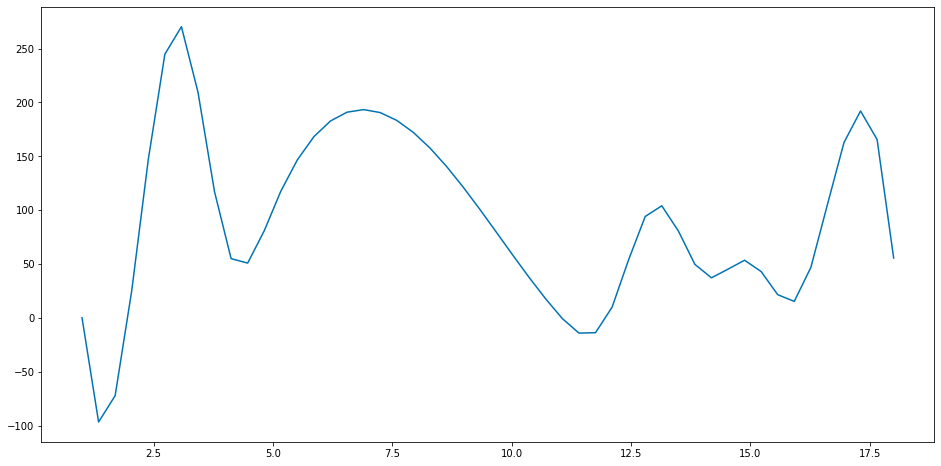

In [12]:
# Set the figure size
plt.rcParams["figure.autolayout"] = False

# x and y data points
x = df[df.Name == "De'Von Achane"].Week
y = df[df.Name == "De'Von Achane"].RushingYards

# Plot the data points
# plt.plot(x, y)

# x_new, bspline, y_new
x_new = np.linspace(1, 18)
bspline = interpolate.make_interp_spline(x, y)
y_new = bspline(x_new)

# Plot the new data points
plt.plot(x_new, y_new)

plt.show()